# 🔴Netflix Visualizations, Recommendation, EDA🍿

https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda/notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from google.colab import drive

In [ ]:
drive.mount('./contents')

Mounted at ./contents


In [ ]:
path = 'contents/MyDrive/Colab Notebooks/mission/data'
os.listdir(path)

['netflix_titles.csv']

# Loading the dataset

In [ ]:
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#########################
# 각 컬럼마다 not-null 수 확인
#########################
# null 값을 가진 컬럼 :
# director, cast, country, date_added, rating, duration
#########################
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [ ]:
#######################################
# type이란 열안에 TV Show에 해당하는 것만 필터링
# 2,676개
#######################################
netflix_shows = df[df['type']=='TV Show']
netflix_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
#######################################
# type이란 열안에 Movie에 해당하는 것만 필터링
# 6,131개
#######################################
netflix_movies=df[df['type']=='Movie']
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Analysis of Movies vs TV Shows.

In [ ]:
#########################################################
# 색상 팔레트 설정 ##########################################
# https://seaborn.pydata.org/tutorial/color_palettes.html
#########################################################
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

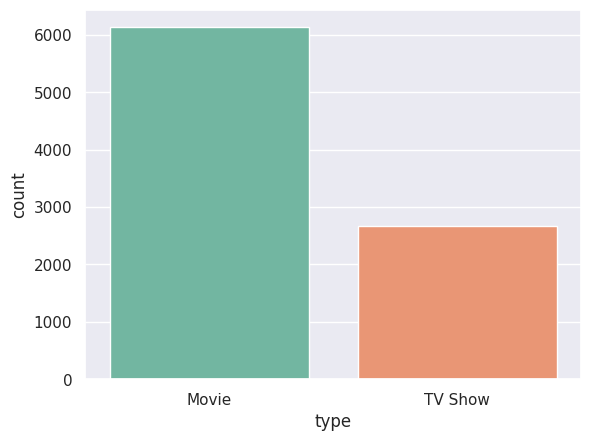

In [ ]:
##################################
# 시각화의 스타일을 darkgrid로 설정
# type 컬럼의 값을 범주화시켜 바차트 그리기
##################################
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")
#######################
# x축은 type, y축은 count
# TV Show보다 Movie를 시청하는 고객이 2배 많다.
# type이란 컬럼 안에는 TV Show, Movie라는 범주만 가지고 있다.
#######################

# If a producer wants to release some content, which month must he do so?
### ( Month when least amount of content is added)

In [ ]:
print(f"date_added의 null 값 : {netflix_shows[['date_added']].isnull().sum()}")
netflix_shows[['date_added']].head()

date_added의 null 값 : date_added    10
dtype: int64


,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [ ]:
####################################################
# dropna로 date_added 컬럼에서 10개의 null 값 제거
# split로 값을 쪼개서 year & month 컬럼 만들기
####################################################
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [ ]:
##########
# 데이터 확인
##########
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [ ]:
########################################################
# 각 월을 리스트로 작성하여 거꾸로 배치한 값을 month_order 변수 넣기
# groupby로 year, month 컬럼을 묶어서 value_counts 후 unstack 코드로 pivot을 한다.
# null값에 0을 채우고 month_order로 컬럼 위치 설정 후 transpose 한다.
########################################################
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

In [ ]:
netflix_date.groupby('year')['month'].value_counts()

year  month    
2008  February      1
2013  October       2
      August        1
      March         1
      September     1
                   ..
2021  April        53
      February     44
      May          38
      March        37
      January      36
Name: month, Length: 88, dtype: int64

In [ ]:
netflix_date.groupby('year')['month'].value_counts().unstack()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0
2014,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2015,4.0,NaN,7.0,1.0,NaN,2.0,2.0,2.0,1.0,2.0,4.0,1.0
2016,8.0,11.0,44.0,6.0,28.0,9.0,7.0,3.0,4.0,18.0,19.0,19.0
2017,27.0,38.0,38.0,17.0,14.0,34.0,29.0,38.0,23.0,30.0,29.0,32.0
2018,28.0,34.0,61.0,24.0,24.0,27.0,28.0,35.0,27.0,36.0,45.0,43.0
2019,43.0,44.0,47.0,45.0,37.0,59.0,46.0,53.0,48.0,68.0,65.0,37.0
2020,50.0,47.0,68.0,42.0,53.0,43.0,41.0,44.0,52.0,51.0,51.0,53.0


In [ ]:
#########
# 결과 확인
#########
netflix_df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


In [ ]:
np.arange(0.5, 12, 1), netflix_df.columns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 Index(['2008', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021'],
       dtype='object', name='year'))

In [ ]:
sns.color_palette("afmhot_r")

[(1.0, 1.0, 0.7176470588235295),
 (1.0, 0.9274509803921569, 0.4274509803921569),
 (1.0, 0.6450980392156862, 0.1450980392156862),
 (0.8549019607843138, 0.3549019607843138, 0.0),
 (0.5725490196078431, 0.0725490196078431, 0.0),
 (0.2823529411764707, 0.0, 0.0)]

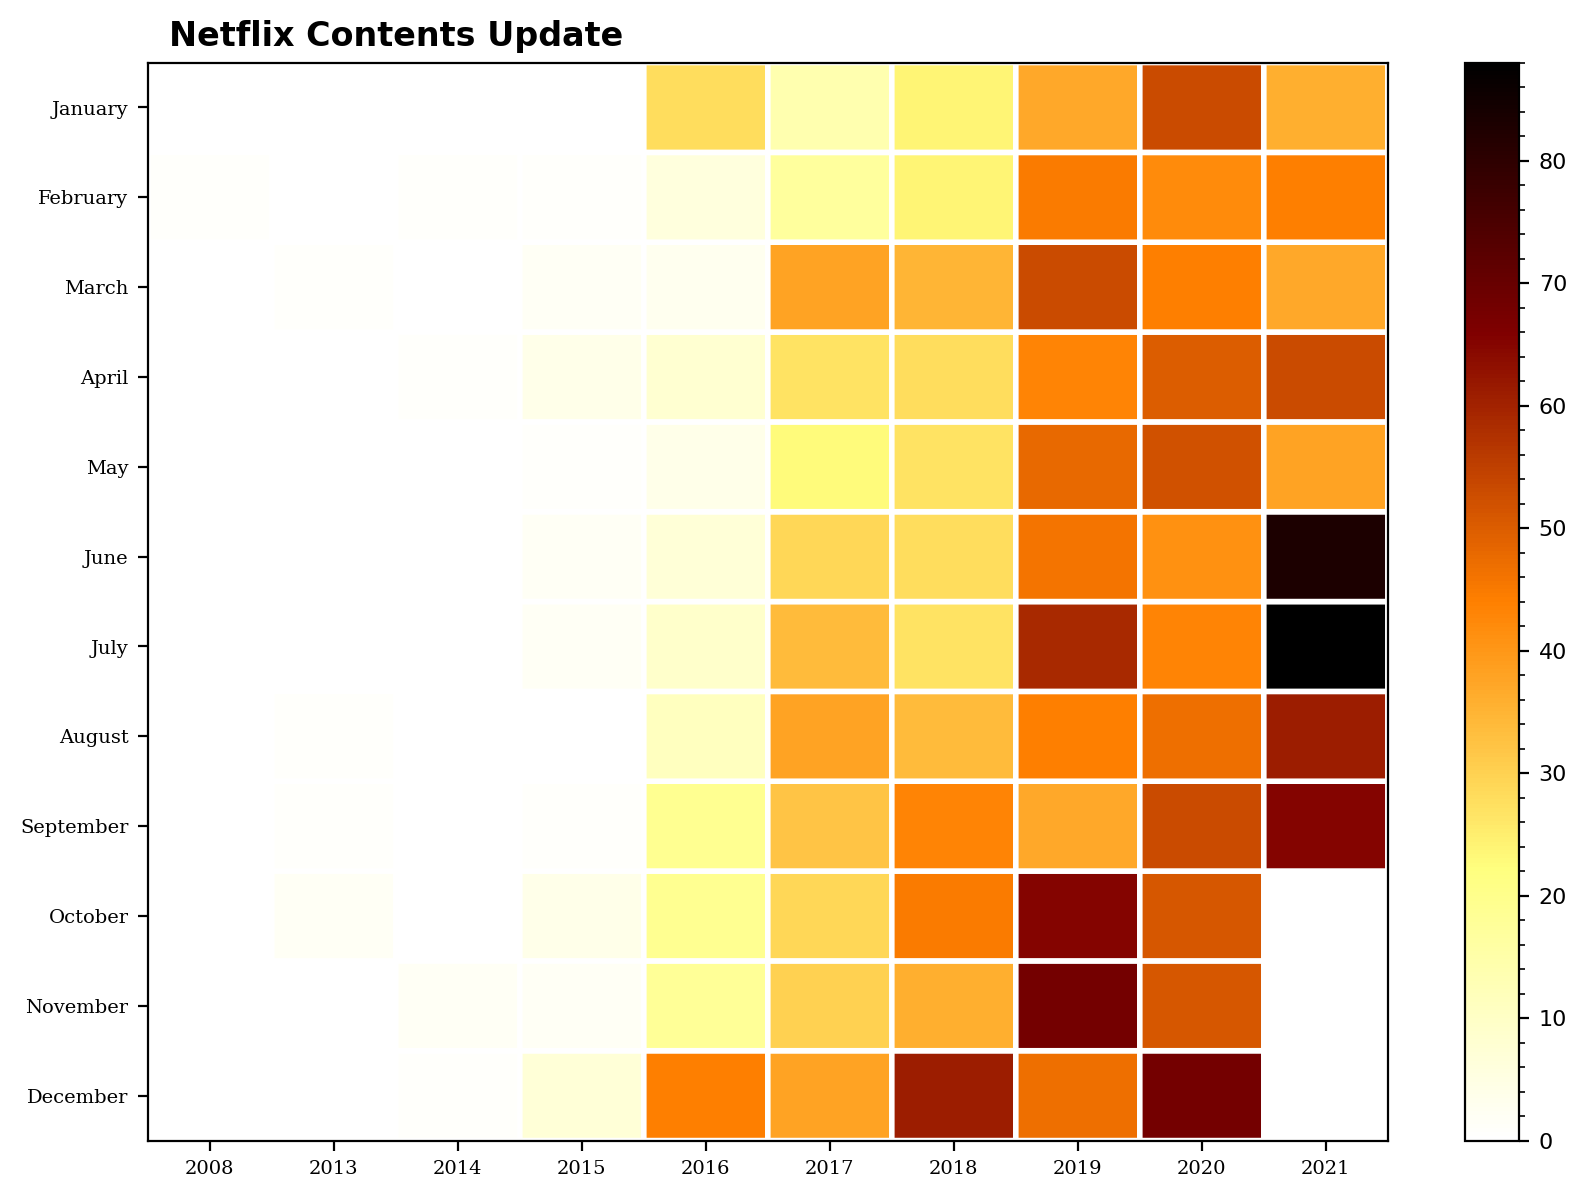

In [ ]:
# 시각화 도화지 크기 설정 및 해상도 설정
# Dots per inch = DPI
plt.figure(figsize=(10, 7), dpi=200)
# pseudocolor 시각화
plt.pcolor(netflix_df,
           cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
# x, y축의 내용 삽입.
plt.xticks(np.arange(0.5, len(netflix_df.columns), 1),
           netflix_df.columns,
           fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix_df.index), 1),
           netflix_df.index,
           fontsize=7, fontfamily='serif')
# 시각화 제목 삽입.
plt.title('Netflix Contents Update',
          fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
# 컬러바 생성 및 글꼴 크기 그리고 눈금 표시
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

netflix_df를 heatmap 으로 시각화 했다.  
컬러바의 색이 어두워질수록 컨텐츠 업데이트 수가 많다.  
21년의 6월, 7월이 컨텐츠 업데이트 수가 제일 많다.  

# Movie ratings analysis

In [ ]:
netflix_movies['rating'].value_counts().index[0:15]

Index(['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13', 'PG', 'TV-Y7', 'TV-Y', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min'],
      dtype='object')

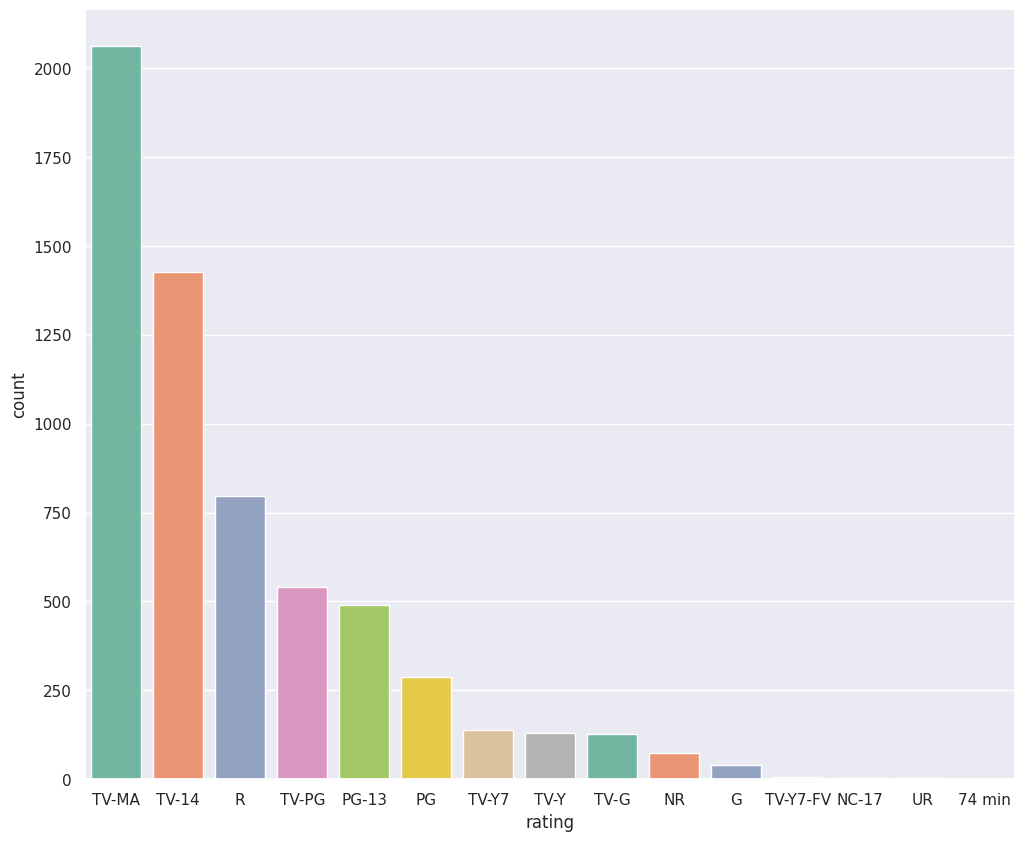

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies,
                   palette="Set2",
                   # rating의 값 17개 중 15개만 선택.
                   order=netflix_movies['rating'].value_counts().index[0:15])

### 넷플릭스 영화 시청 등급 Top 3(약 70%)
1. TV-MA (약 33%)  
> Mature Audience Only(17세 이상)

2. TV-14 (약 23%)
> 14세 미만에겐 부적절한 콘텐츠.

3. R (Restricted) (약 13%)
> 17세 미만은 보호자 동반 시청 가능.


In [ ]:
############################################
# 넷플릭스의 영화 시청 등급 Top 3가 약 70%를 차지한다.
############################################
print(f"TV-MA 등급 : {round(netflix_movies['rating'].value_counts()[0] / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")
print(f"TV-14 등급 : {round(netflix_movies['rating'].value_counts()[1] / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")
print(f"R 등급 : {round(netflix_movies['rating'].value_counts()[2] / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")
print('------------------')
print(f"Top 3 등급 : {round(sum(netflix_movies['rating'].value_counts()[:3]) / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")

TV-MA 등급 : 34.0%
TV-14 등급 : 23.0%
R 등급 : 13.0%
------------------
Top 3 등급 : 70.0%


# Analysing IMDB ratings to get top rated movies on Netflix

In [ ]:
os.listdir(path)

['netflix_titles.csv', 'IMDb_ratings.csv', 'IMDB_movie.csv']

# Loading the dataset

In [ ]:
imdb_ratings = pd.read_csv(os.path.join(path, os.listdir(path)[1]), usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv(os.path.join(path, os.listdir(path)[2]), usecols=['Title','Year','Genre'])

In [ ]:
imdb_ratings

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0
...,...
85850,5.3
85851,7.7
85852,7.9
85853,6.4


In [ ]:
imdb_titles

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016
...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery",2015
996,Hostel: Part II,Horror,2007
997,Step Up 2: The Streets,"Drama,Music,Romance",2008
998,Search Party,"Adventure,Comedy",2014


In [ ]:
ratings = pd.DataFrame({'Title':imdb_titles.Title,
                    'Release Year':imdb_titles.Year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.Genre})
ratings

,Title,Release Year,Rating,Genre
0,Guardians of the Galaxy,2014.0,5.9,"Action,Adventure,Sci-Fi"
1,Prometheus,2012.0,6.1,"Adventure,Mystery,Sci-Fi"
2,Split,2016.0,5.8,"Horror,Thriller"
3,Sing,2016.0,5.2,"Animation,Comedy,Family"
4,Suicide Squad,2016.0,7.0,"Action,Adventure,Fantasy"
...,...,...,...,...
85850,NaN,NaN,5.3,NaN
85851,NaN,NaN,7.7,NaN
85852,NaN,NaN,7.9,NaN
85853,NaN,NaN,6.4,NaN


In [ ]:
ratings.isnull().sum()

Title           84855
Release Year    84855
Rating              0
Genre           84855
dtype: int64

In [ ]:
#####################################
# Title, Release Year, Rating의 열에서
# 중복된 값 제거
#####################################
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)

In [ ]:
#####
# 확인
#####
display(ratings)

,Title,Release Year,Rating,Genre
0,Guardians of the Galaxy,2014.0,5.9,"Action,Adventure,Sci-Fi"
1,Prometheus,2012.0,6.1,"Adventure,Mystery,Sci-Fi"
2,Split,2016.0,5.8,"Horror,Thriller"
3,Sing,2016.0,5.2,"Animation,Comedy,Family"
4,Suicide Squad,2016.0,7.0,"Action,Adventure,Fantasy"
...,...,...,...,...
54166,NaN,NaN,9.5,NaN
54217,NaN,NaN,9.8,NaN
55972,NaN,NaN,1.0,NaN
56329,NaN,NaN,9.7,NaN


In [ ]:
ratings.isnull().sum()

Title           89
Release Year    89
Rating           0
Genre           89
dtype: int64

In [ ]:
################################################
# null 값 제거 후 inner join 한 후 왼쪽에는 Title 붙이기
################################################
ratings = ratings.dropna()
joint_data=ratings.merge(df,left_on='Title',right_on='title',how='inner')

In [ ]:
joint_data

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Mindhorn,2016.0,6.2,Comedy,s5491,Movie,Mindhorn,Sean Foley,"Julian Barratt, Andrea Riseborough, Essie Davi...",United Kingdom,"May 12, 2017",2017,TV-MA,88 min,"Comedies, Cult Movies, Independent Movies",When a twisted killer tells the police he'll o...
1,Nocturnal Animals,2016.0,5.2,"Drama,Thriller",s1541,Movie,Nocturnal Animals,Tom Ford,"Amy Adams, Jake Gyllenhaal, Michael Shannon, A...",United States,"December 16, 2020",2016,R,117 min,"Dramas, Thrillers",Reading her ex-husband's violent novel manuscr...
2,Moonlight,2016.0,5.3,Drama,s7508,Movie,Moonlight,Barry Jenkins,"Trevante Rhodes, André Holland, Janelle Monáe,...",United States,"May 21, 2019",2016,R,111 min,"Dramas, Independent Movies, LGBTQ Movies","In a crime-infested Miami neighborhood, a gay ..."
3,The Founder,2016.0,6.4,"Biography,Drama,History",s8313,Movie,The Founder,John Lee Hancock,"Laura Dern, B.J. Novak, Patrick Wilson, John C...","United States, Greece","August 21, 2020",2016,PG-13,115 min,Dramas,After a fateful encounter with the McDonald br...
4,Lowriders,2016.0,5.7,Drama,s709,Movie,Lowriders,Ricardo de Montreuil,"Demián Bichir, Gabriel Chavarria, Theo Rossi, ...",United States,"June 16, 2021",2016,PG-13,98 min,"Dramas, Independent Movies",Caught up in the lowrider world of his father ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Taare Zameen Par,2007.0,5.3,"Drama,Family,Music",s1023,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"April 17, 2021",2007,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...
278,Take Me Home Tonight,2011.0,5.1,"Comedy,Drama,Romance",s8147,Movie,Take Me Home Tonight,Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...","United States, Germany","May 16, 2019",2011,R,97 min,"Comedies, Romantic Movies","Set in the financial boom of the late 1980s, t..."
279,Resident Evil: Afterlife,2010.0,6.6,"Action,Adventure,Horror",s7858,Movie,Resident Evil: Afterlife,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Kim Coates, Shawn ...","Germany, France, United States, Canada, United...","January 1, 2020",2010,R,97 min,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",The Undead Apocalypse continues as super-soldi...
280,Secret in Their Eyes,2015.0,5.9,"Crime,Drama,Mystery",s7970,Movie,Secret in Their Eyes,Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...","United States, United Kingdom, Spain, South Korea","April 1, 2018",2015,PG-13,111 min,"Dramas, Thrillers",A former FBI investigator reopens the haunting...


In [ ]:
######################################
# Rating 열 기준으로 숫자가 높은 순서대로 정렬
#######################################
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [ ]:
joint_data

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
130,Savages,2012.0,8.3,"Crime,Drama,Thriller",s1200,Movie,Savages,Oliver Stone,"Taylor Kitsch, Aaron Taylor-Johnson, Blake Liv...",United States,"March 16, 2021",2012,R,131 min,"Dramas, Thrillers","With the help of a shady DEA agent, two weed e..."
106,Tusk,2014.0,8.2,"Comedy,Drama,Horror",s8643,Movie,Tusk,Kevin Smith,"Michael Parks, Justin Long, Haley Joel Osment,...",United States,"July 24, 2018",2014,R,102 min,Horror Movies,When a wise-guy podcaster interviews a disable...
168,The Whole Truth,2016.0,8.1,"Crime,Drama,Mystery",s954,Movie,The Whole Truth,Courtney Hunt,"Keanu Reeves, Renée Zellweger, Gugu Mbatha-Raw...",United States,"May 1, 2021",2016,R,93 min,"Dramas, Thrillers",Trying to earn an acquittal for a teen client ...
152,Kickboxer: Vengeance,2016.0,8.1,Action,s7193,Movie,Kickboxer: Vengeance,John Stockwell,"Alain Moussi, Jean-Claude Van Damme, Dave Baut...",United States,"December 8, 2016",2016,TV-MA,90 min,Action & Adventure,"After a skilled fighter falls in the ring, his..."
42,Twilight,2008.0,8.1,"Drama,Fantasy,Romance",s452,Movie,Twilight,Catherine Hardwicke,"Kristen Stewart, Robert Pattinson, Billy Burke...",United States,"July 16, 2021",2008,PG-13,122 min,"Action & Adventure, Dramas, Romantic Movies","When Bella Swan moves in with her father, she ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Inception,2010.0,4.7,"Action,Adventure,Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
265,Talladega Nights: The Ballad of Ricky Bobby,2006.0,4.7,"Action,Comedy,Sport",s598,Movie,Talladega Nights: The Ballad of Ricky Bobby,Adam McKay,"Will Ferrell, John C. Reilly, Sacha Baron Cohe...",United States,"July 1, 2021",2006,PG-13,108 min,"Action & Adventure, Comedies, Sports Movies",NASCAR superstar Ricky Bobby believes he's the...
157,Never Back Down,2008.0,4.0,"Action,Drama,Sport",s944,Movie,Never Back Down,Jeff Wadlow,"Sean Faris, Amber Heard, Cam Gigandet, Evan Pe...",United States,"May 1, 2021",2008,PG-13,113 min,"Action & Adventure, Dramas, Sports Movies",When a quick-tempered teen moves to a new town...
38,Scott Pilgrim vs. the World,2010.0,3.9,"Action,Comedy,Fantasy",s7961,Movie,Scott Pilgrim vs. the World,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...","United States, United Kingdom, Canada, Japan","September 16, 2018",2010,PG-13,112 min,"Action & Adventure, Comedies, Cult Movies",Dreamy delivery girl Ramona captures Scott Pil...


# SunBurst Chart

https://plotly.com/python/sunburst-charts/

A sunburst plot represents hierarchial data as sectors laid out over several levels of concentric rings.

In [ ]:
# Top 10 rating
import plotly.express as px

top_10 = joint_data.head(10) # joint_data[:10]
fig =px.sunburst(
                top_10,
                path=['title','country'],
                values='Rating',
                color='Rating')
fig.show()

밝은 색일수록 rating이 높다.
> 미국의 Savages 영화가 8.3점이다.

In [ ]:
joint_data['country'].value_counts()

United States                                     127
United Kingdom, United States                      13
India                                              11
United Kingdom                                      8
United States, United Kingdom                       7
                                                 ... 
United States, Chile                                1
United States, New Zealand                          1
United Kingdom, Germany, France, United States      1
United Kingdom, South Africa                        1
United States, United Kingdom, Canada, Japan        1
Name: country, Length: 95, dtype: int64

In [ ]:
#############
# 국가별 Top 10
#############
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
top_countries=country_count[0:11]
top_countries

,country
United States,127
"United Kingdom, United States",13
India,11
United Kingdom,8
"United States, United Kingdom",7
Canada,4
South Korea,4
"Germany, United States",3
"United States, Germany",3
"Canada, United States",3


# Funnel Chart

https://plotly.com/python/funnel-charts/

In [ ]:
import plotly.express as px

data = dict(
            number=[158, 30, 11, 7, 6, 4, 2],
            country=["United States", "United Kingdom", "India", "Canada", 'Germany', 'South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

미국의 수치가 제일 많다.

# Year wise analysis

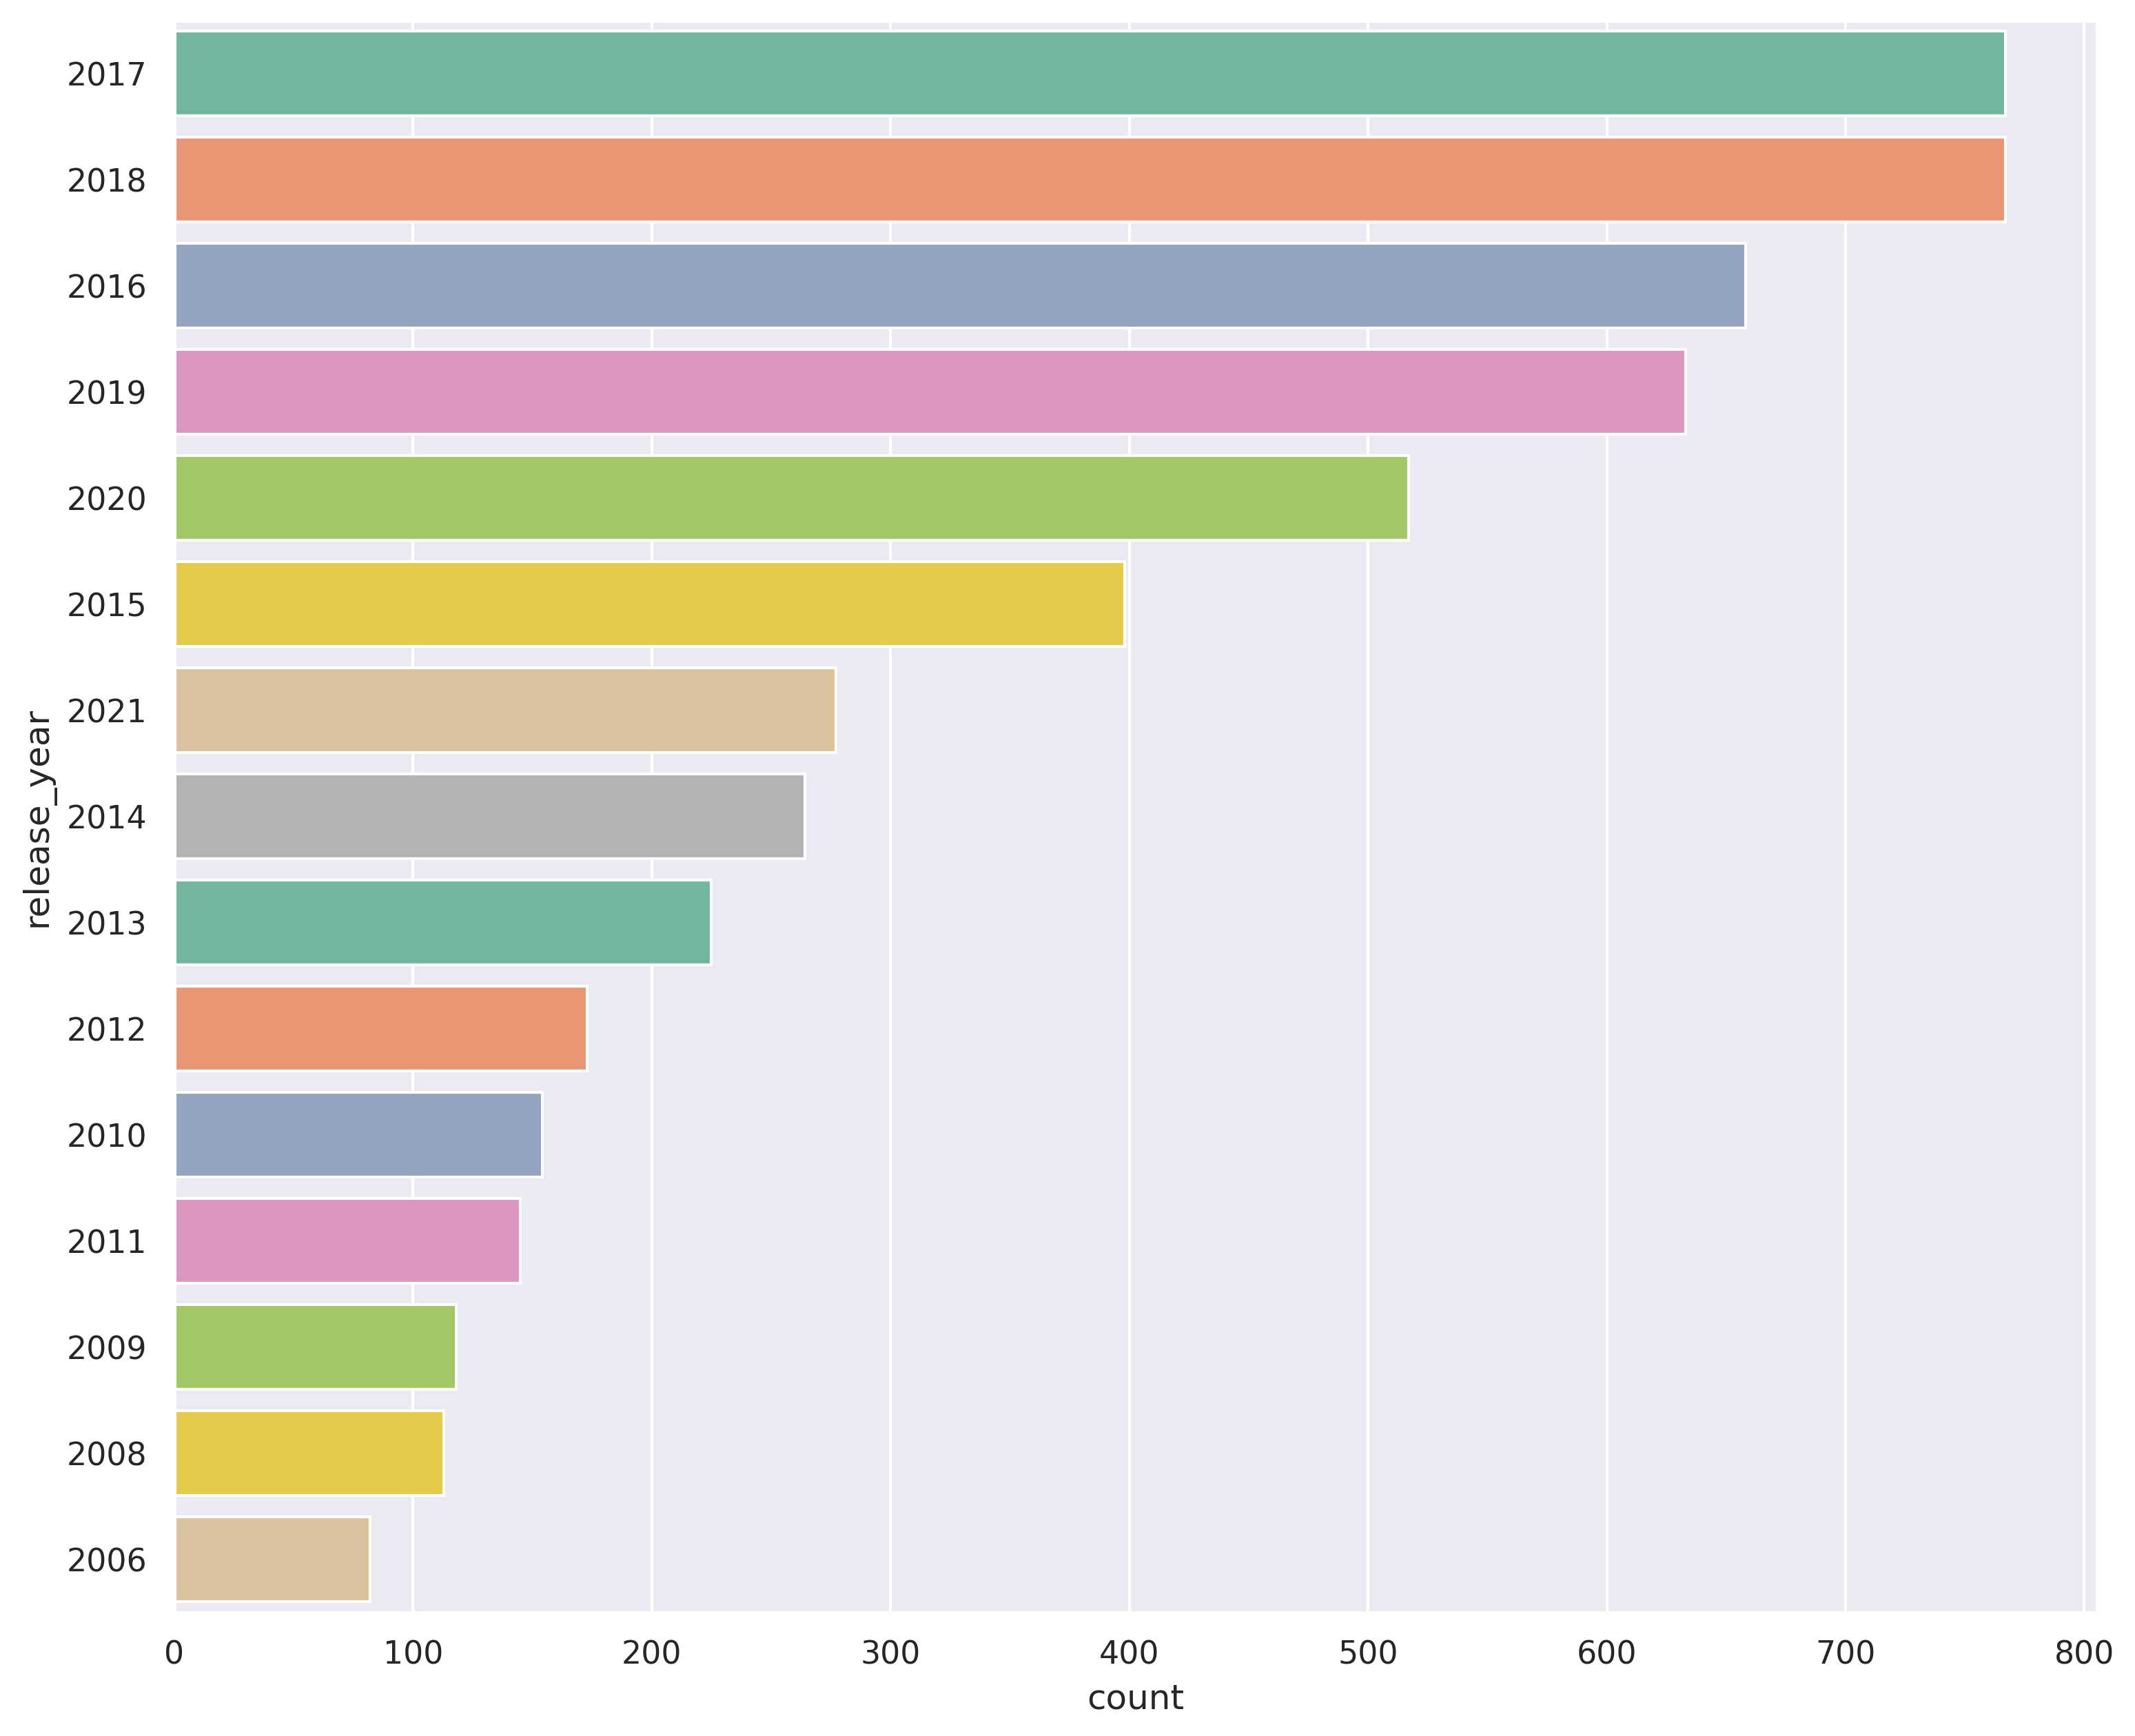

In [ ]:
plt.figure(figsize=(12,10), dpi=300)
sns.set(style="darkgrid")

ax = sns.countplot(y="release_year",
                   data=netflix_movies,
                   palette="Set2",
                   order=netflix_movies['release_year'].value_counts().index[0:15])

In [ ]:
#########################################
# 2017년, 2018년 출시 작품 수가 767개로 동일하다.
# 2017, 2018년 출시 작품이 제일 많다.
#########################################
print(f"2017년 출시 : {len(netflix_movies[netflix_movies['release_year']==2017])}개")
print(f"2018년 출시 : {len(netflix_movies[netflix_movies['release_year']==2018])}개")

2017년 출시 : 767개
2018년 출시 : 767개


In [ ]:
netflix_movies['country'].isnull().sum()

440

In [ ]:
countries={}
# null 값 Unknown으로 채우기
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
# country 컬럼 값을 리스트 형태로 변환
cou = list(netflix_movies['country'])
# , 기준으로 split
for i in cou:
    # print(i) # 국가 출력.
    # , 기준으로 split 후 list 형태로 변경
    i = list(i.split(','))

    # list의 값이 1개라면
    if len(i)==1:
        # countries 딕셔너리에 있다면 + 1
        if i in list(countries.keys()):
            countries[i] += 1
        # countries 딕셔너리에 없다면 1
        else:
            countries[i[0]] = 1

    # list의 값이 1개가 아니라면
    else:
        for j in i: # ex) i = ['United Kingdom', ' Germany']
            # countries 딕셔너리에 있다면 + 1
            if j in list(countries.keys()):
                countries[j] += 1
            # countries 딕셔너리에 없다면 1
            else:
                countries[j] = 1

<ipython-input-99-2c2d1f113846>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
countries

{'United States': 1,
 'Unknown': 1,
 ' Ghana': 1,
 ' Burkina Faso': 1,
 ' United Kingdom': 152,
 ' Germany': 104,
 ' Ethiopia': 1,
 'Germany': 3,
 ' Czech Republic': 11,
 'India': 1,
 ' India': 35,
 ' France': 155,
 'China': 1,
 ' Canada': 132,
 ' United States': 388,
 'South Africa': 7,
 ' Japan': 34,
 'Japan': 3,
 'Nigeria': 1,
 'Spain': 1,
 'France': 3,
 'United Kingdom': 1,
 ' Australia': 33,
 ' Mexico': 25,
 ' Italy': 27,
 ' Romania': 4,
 'Australia': 1,
 'Argentina': 2,
 ' Venezuela': 2,
 ' Hong Kong': 24,
 'Canada': 2,
 'Hong Kong': 1,
 ' China': 55,
 'Italy': 1,
 ' Nepal': 2,
 'New Zealand': 2,
 ' Brazil': 10,
 ' Greece': 8,
 'Colombia': 1,
 'Mexico': 1,
 'Belgium': 1,
 'Switzerland': 5,
 'Brazil': 1,
 ' Spain': 42,
 ' Nigeria': 7,
 'Bulgaria': 4,
 '': 6,
 ' Algeria': 3,
 'Poland': 1,
 ' Israel': 7,
 'Saudi Arabia': 1,
 'Thailand': 1,
 'Indonesia': 1,
 'Egypt': 3,
 ' Denmark': 15,
 ' Switzerland': 11,
 'Kuwait': 1,
 ' Netherlands': 19,
 ' Singapore': 8,
 'Malaysia': 1,
 'South 

In [ ]:
#################
# 국가 딕서너리 전처리
#################
countries_fin={}
for country, no in countries.items():
    country= country.replace(' ','') # ' Brazil' -> 'Brazil'

    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no

In [ ]:
countries_fin.items()

dict_items([('UnitedStates', 389), ('Unknown', 1), ('Ghana', 3), ('BurkinaFaso', 1), ('UnitedKingdom', 153), ('Germany', 107), ('Ethiopia', 1), ('CzechRepublic', 16), ('India', 36), ('France', 158), ('China', 56), ('Canada', 134), ('SouthAfrica', 23), ('Japan', 37), ('Nigeria', 8), ('Spain', 43), ('Australia', 34), ('Mexico', 26), ('Italy', 28), ('Romania', 5), ('Argentina', 17), ('Venezuela', 4), ('HongKong', 25), ('Nepal', 2), ('NewZealand', 12), ('Brazil', 11), ('Greece', 9), ('Colombia', 6), ('Belgium', 70), ('Switzerland', 16), ('Bulgaria', 9), ('', 6), ('Algeria', 3), ('Poland', 11), ('Israel', 8), ('SaudiArabia', 3), ('Thailand', 6), ('Indonesia', 4), ('Egypt', 7), ('Denmark', 17), ('Kuwait', 1), ('Netherlands', 22), ('Singapore', 12), ('Malaysia', 3), ('SouthKorea', 15), ('Vietnam', 1), ('Hungary', 6), ('Lebanon', 8), ('Syria', 2), ('Philippines', 4), ('UnitedArabEmirates', 19), ('Sweden', 24), ('Qatar', 10), ('Mauritius', 1), ('Austria', 5), ('Turkey', 3), ('Russia', 9), ('Tai

In [ ]:
####################
# 국가 수가 많은 순서대로 정렬
# k : 국가
# v : 국가 수
# 이런 형태로 딕서녀리에 저장
# 전처리 끝
####################
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

In [ ]:
countries_fin.items()

dict_items([('UnitedStates', 389), ('France', 158), ('UnitedKingdom', 153), ('Canada', 134), ('Germany', 107), ('Belgium', 70), ('China', 56), ('Spain', 43), ('Japan', 37), ('India', 36), ('Australia', 34), ('Italy', 28), ('Mexico', 26), ('HongKong', 25), ('Sweden', 24), ('SouthAfrica', 23), ('Netherlands', 22), ('UnitedArabEmirates', 19), ('Argentina', 17), ('Denmark', 17), ('CzechRepublic', 16), ('Switzerland', 16), ('SouthKorea', 15), ('NewZealand', 12), ('Singapore', 12), ('Brazil', 11), ('Poland', 11), ('Ireland', 11), ('Norway', 11), ('Qatar', 10), ('Luxembourg', 10), ('Greece', 9), ('Bulgaria', 9), ('Russia', 9), ('Nigeria', 8), ('Israel', 8), ('Lebanon', 8), ('Egypt', 7), ('Chile', 7), ('Uruguay', 7), ('Serbia', 7), ('Jordan', 7), ('Finland', 7), ('Colombia', 6), ('', 6), ('Thailand', 6), ('Hungary', 6), ('Taiwan', 6), ('Cambodia', 6), ('Portugal', 6), ('Iceland', 6), ('Peru', 6), ('Morocco', 6), ('Romania', 5), ('Austria', 5), ('Venezuela', 4), ('Indonesia', 4), ('Philippines'

# TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

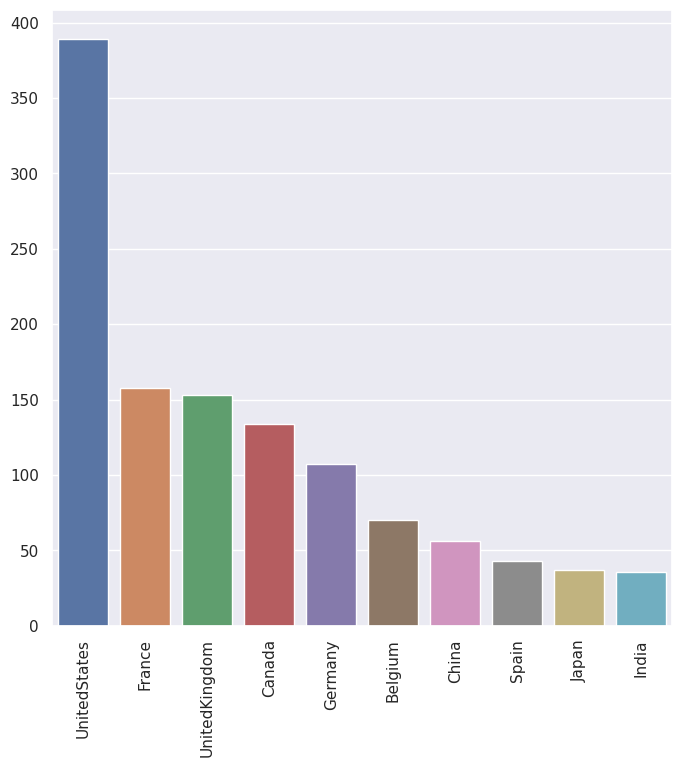

In [ ]:
plt.figure(figsize=(8,8))

ax = sns.barplot(x=list(countries_fin.keys())[0:10],
                 y=list(countries_fin.values())[0:10])

ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

미국이 영화 컨텐츠를 제일 많이 만든 국가이다.

# Analysis of duration of movies

In [ ]:
netflix_movies['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [ ]:
netflix_movies['duration'].isnull().sum()

3

In [ ]:
###################################
# min 문구 없앤 후 object -> int로 변경
###################################
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']= netflix_movies['duration'].fillna('0').astype(str).astype(int)

<ipython-input-116-d87e4dfdd991>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
netflix_movies['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

<ipython-input-118-98061c1e03af>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




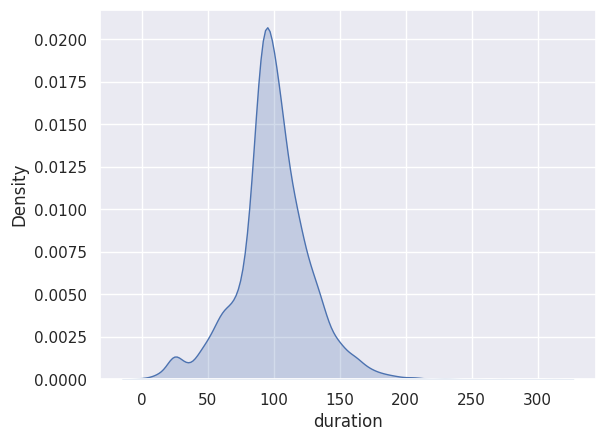

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True);

넷플릭스 영화를 75 ~ 120분 정도 시청을 한다.  
움직이지 않고서는 3시간 이상은 시청을 안 한다.

# WordCloud for Genres

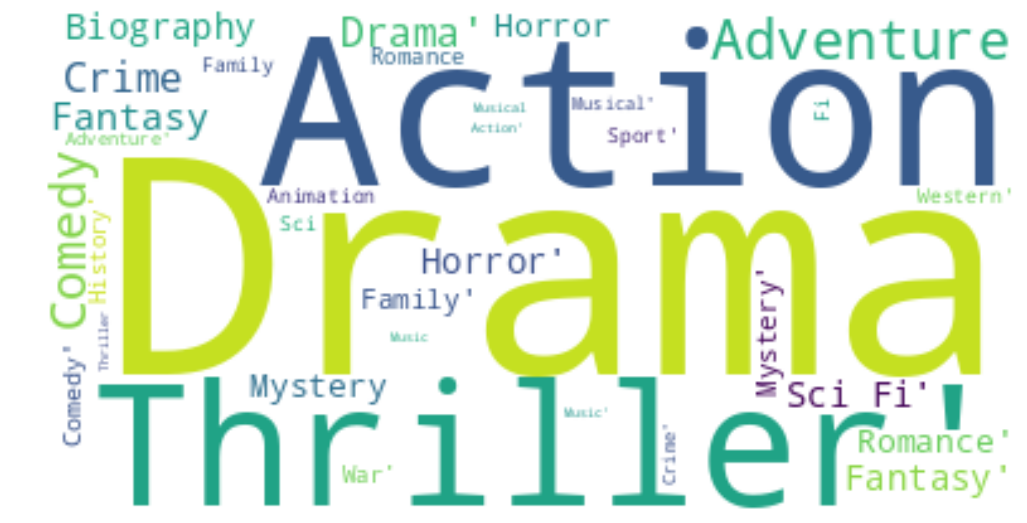

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(joint_data['Genre']))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
# mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,
                      background_color="white",
                      #mask=mask
                      ).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Action, Drama, Thriller 의 장르를 많이 보았음을 알 수 있다.

In [ ]:
joint_data['Genre']

130       Crime,Drama,Thriller
106        Comedy,Drama,Horror
168        Crime,Drama,Mystery
152                     Action
42       Drama,Fantasy,Romance
                ...           
16     Action,Adventure,Sci-Fi
265        Action,Comedy,Sport
157         Action,Drama,Sport
38       Action,Comedy,Fantasy
196        Action,Drama,Family
Name: Genre, Length: 282, dtype: object

In [ ]:
genres={}

# , 기준으로 split
for i in list(joint_data['Genre']):
    # print(i) # 장르 출력.
    # , 기준으로 split 후 list 형태로 변경
    i = list(i.split(','))

    # list의 값이 1개라면
    if len(i)==1:
        # genres 딕셔너리에 있다면 + 1
        if i in list(genres.keys()):
            genres[i] += 1
        # genres 딕셔너리에 없다면 1
        else:
            genres[i[0]] = 1

    # list의 값이 1개가 아니라면
    else:
        for j in i: # ex) i = ['Comedy','Drama','Horror']
            # genres 딕셔너리에 있다면 + 1
            if j in list(genres.keys()):
                genres[j] += 1
            # genres 딕셔너리에 없다면 1
            else:
                genres[j] = 1

In [ ]:
genres

{'Crime': 40,
 'Drama': 12,
 'Thriller': 1,
 'Comedy': 9,
 'Horror': 7,
 'Mystery': 32,
 'Action': 70,
 'Fantasy': 27,
 'Romance': 44,
 'Biography': 27,
 'Musical': 3,
 'Adventure': 46,
 'Sci-Fi': 16,
 'History': 8,
 'Family': 13,
 'War': 4,
 'Music': 2,
 'Animation': 7,
 'Sport': 6,
 'Western': 3}

In [ ]:
#################
# 장르 딕서너리 전처리
#################
genres_fin = {k: v for k, v in sorted(genres.items(), key=lambda item: item[1], reverse= True)}

In [ ]:
genres_fin

{'Action': 70,
 'Adventure': 46,
 'Romance': 44,
 'Crime': 40,
 'Mystery': 32,
 'Fantasy': 27,
 'Biography': 27,
 'Sci-Fi': 16,
 'Family': 13,
 'Drama': 12,
 'Comedy': 9,
 'History': 8,
 'Horror': 7,
 'Animation': 7,
 'Sport': 6,
 'War': 4,
 'Musical': 3,
 'Western': 3,
 'Music': 2,
 'Thriller': 1}

<ipython-input-131-2bf0c809422b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



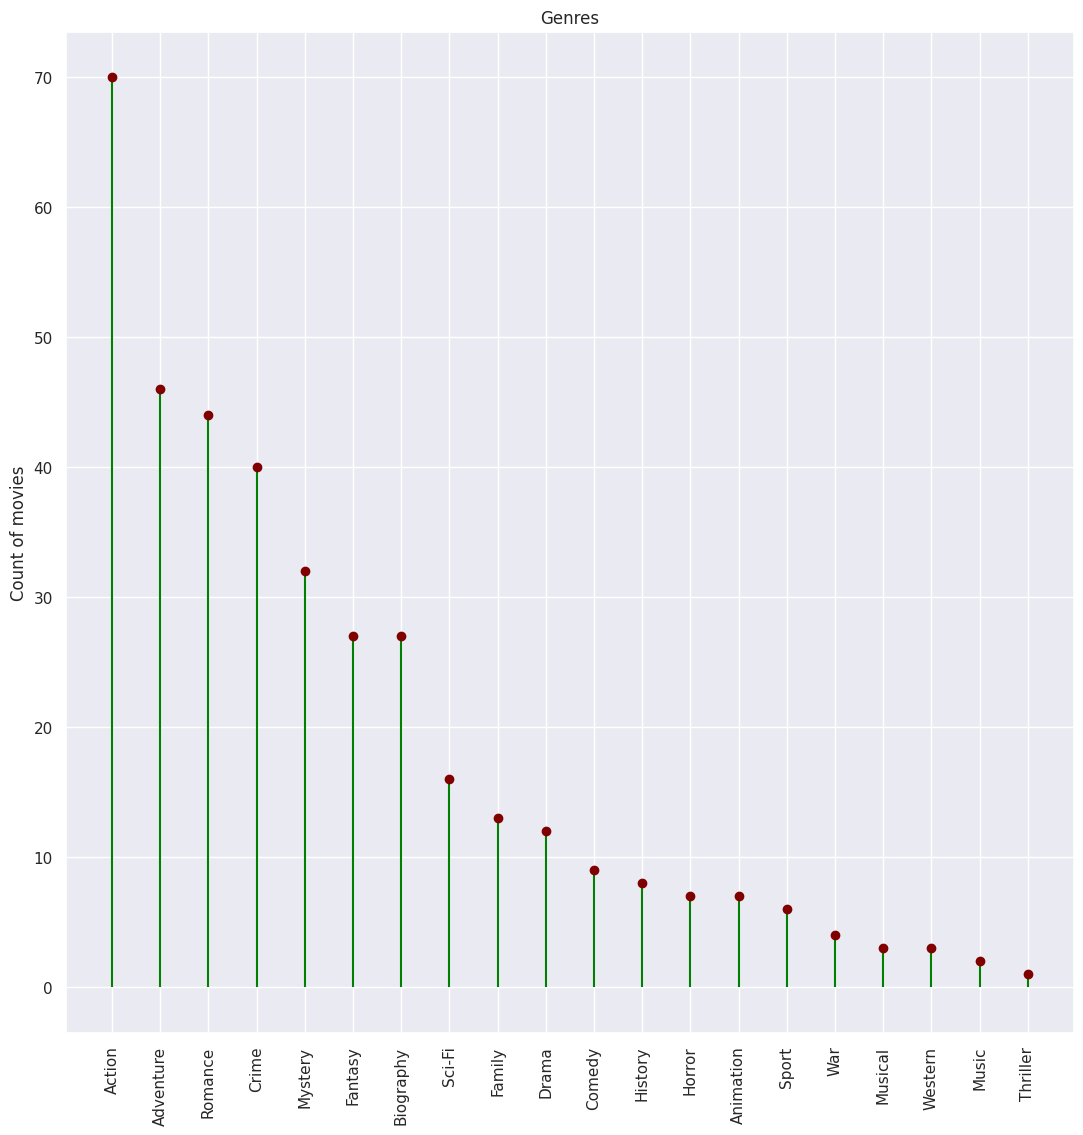

<Figure size 1000x1000 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))

x=list(genres_fin.keys())
y=list(genres_fin.values())

# Plot vertical lines
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x, y, "o", color='maroon')

ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

Action 을 많이 본다.  
Thriller를 제일 적게 본다

# Analysis of TV SERIES on Netflix

In [ ]:
netflix_shows['country'].isnull().sum()

391

In [ ]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')

cou1=list(netflix_shows['country'])

for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

<ipython-input-135-67f8963a7668>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no

countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

# Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

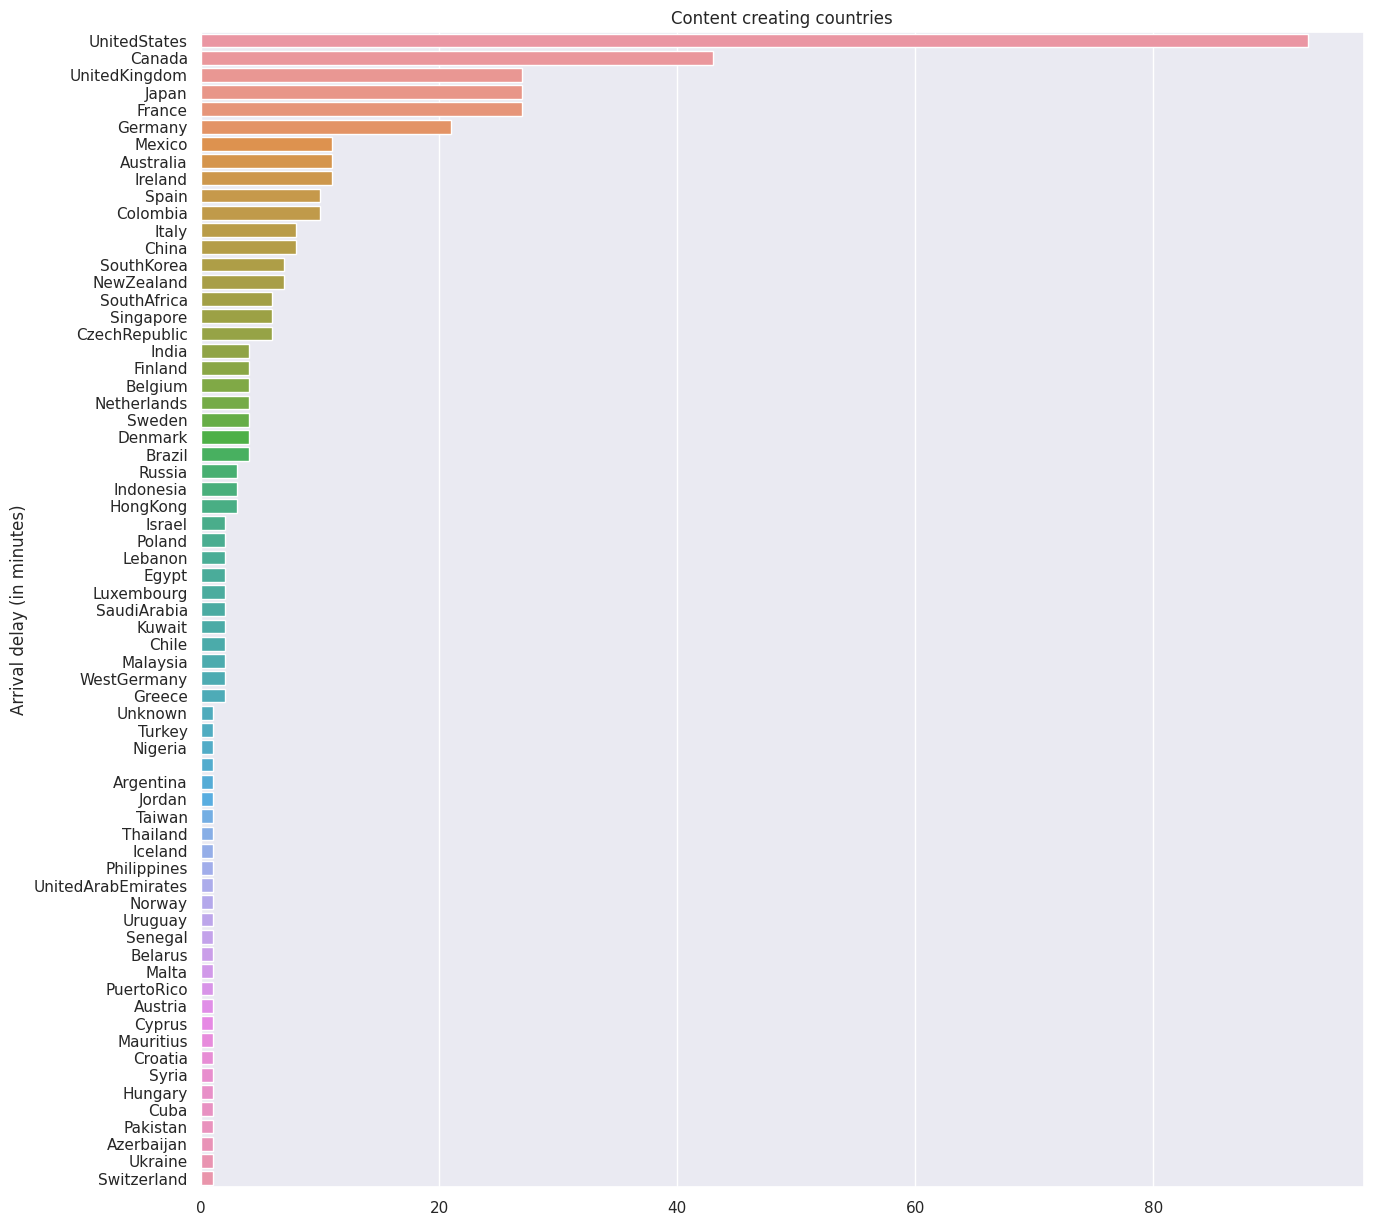

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()),
            x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

미국이 압도적으로 제일 많이 컨텐츠를 만들었다.

In [ ]:
netflix_shows.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_shows['duration']

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2676, dtype: object

In [ ]:
features=['title','duration']
durations= netflix_shows[features]

# 2 Seasons -> 2s
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

# 2s -> 2
#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

<ipython-input-141-dfedf649a3e0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-dfedf649a3e0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

<ipython-input-142-ad93769c4198>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
durations

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


# TV shows with largest number of seasons

In [ ]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

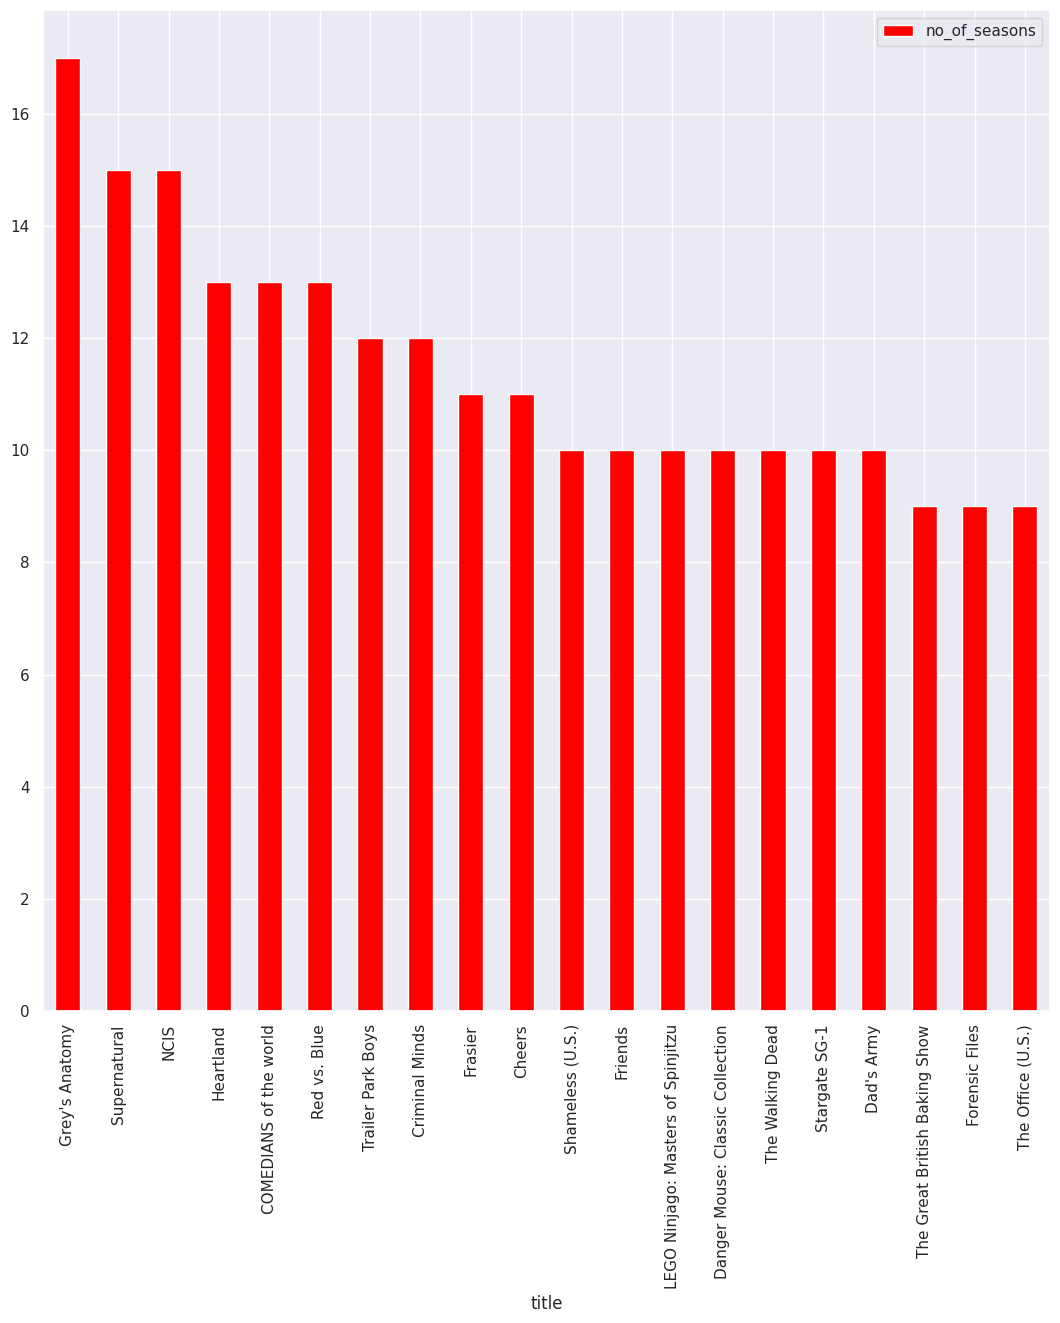

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',
           x='title',y='no_of_seasons',
           color='red');

Top 20로 몇 시즌까지 방영했는가를 시각화 했다.  
제일 오랫동안 방영한.  
Grey's Anatomy가 시즌 17 이다.

# Lowest number of seasons

### Graph Objects
https://plotly.com/python/graph-objects/

https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html#id0

In [ ]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],
                                    bottom['no_of_seasons']],
                            fill_color='lavender'))
                     ])
fig.show()

시즌 1밖에 없기에 몰아서 보기 좋을 수도 있다.

# 미국에서 가장 오래된 영화

In [ ]:
# 국가를 미국으로 설정
us_series_data = netflix_shows[netflix_shows['country']=='United States']
# 출시일을 ascending으로 설정
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

# table 형태로 시각화
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],
                                    oldest_us_series['release_year']],
                            fill_color='pink'))
                     ])
fig.show()

Five came back 1945년.

<img src='https://images.justwatch.com/poster/248492873/s718/five-came-back-the-reference-films.jpg' width='25%'>

In [149]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],
                                    newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

<img src='https://m.media-amazon.com/images/M/MV5BMTc0YTU5MWQtZGRhYy00MWI1LTlkNTEtYzRkMjE4NzU2ZTlkXkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_.jpg' width='25%'>

Dear white people

In [151]:
df[df['country']=='France'].isnull().sum()

show_id          0
type             0
title            0
director        43
cast            18
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [152]:
netflix_fr = df[df['country']=='France']
nannef = netflix_fr.dropna()

import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director',
                 hover_data=['director','title'],
                 color_continuous_scale='Purples')
fig.show()

In [155]:
len(nannef[nannef['director'] == 'Thierry Donard'])
# Thierry Donard 라는 감독이 5번이나 작품을 출시했다.

5

In [156]:
# 출시 연도 기준으로 descending으로 정렬
newest_fr_series = netflix_fr.sort_values(by='release_year', ascending=False)[0:20]

In [159]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],
                                    newest_fr_series['release_year']]))
                     ])
fig.show()

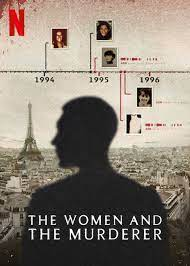

# Top Duration

In [160]:
topdirs = pd.value_counts(df['duration'])
# df['duration'].value_counts()

fig = go.Figure([go.Bar(x=topdirs.index,
                        y=topdirs.values ,
                        text=topdirs.values,
                        marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')
fig.show()

Season 1을 제일 많이 보았다.

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
df['description'].isnull().sum()

0

In [165]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

# #Replace NaN with an empty string
# df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [167]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [168]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01538292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02230089, ..., 0.        , 0.        ,
        1.        ]])

In [169]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [170]:
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [171]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    ####
    # indices['Peaky Blinders'] -> 3452
    ####

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    ######
    # cosine_sim[3452]
    # > array([0.        , 0.        , 0.        , ..., 0.01938176, 0.  ,0.        ])
    ######
    # list(enumerate(cosine_sim[3452]))
    # > (9, 0.0),
    # > (10, 0.03247081175763527),
    ######
    # Sort the movies based on the similarity scores
    # 내림 차순으로 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [176]:
# top 10 유사한 영화 추천.
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [177]:
get_recommendations('Mortel')

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
4511         Edgar Rice Burroughs' Tarzan and Jane
6749                             Figures of Speech
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

In [178]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [179]:
filledna=df.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [180]:
#####################
# 전처리 후 소문자로 바꾸기
#####################
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [181]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [183]:
filledna.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [184]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)

filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


# Creating a "soup" or a "bag of words" for all rows.

In [185]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [186]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [188]:
filledna['soup']

0       dickjohnsonisdead kirstenjohnson  documentarie...
1       blood&water  amaqamata,khosingema,gailmabalane...
2       ganglands julienleclercq samibouajila,tracygot...
3       jailbirdsneworleans   docuseries,realitytv feu...
4       kotafactory  mayurmore,jitendrakumar,ranjanraj...
                              ...                        
8802    zodiac davidfincher markruffalo,jakegyllenhaal...
8803    zombiedumb   kids'tv,koreantvshows,tvcomedies ...
8804    zombieland rubenfleischer jesseeisenberg,woody...
8805    zoom peterhewitt timallen,courteneycox,chevych...
8806    zubaan mozezsingh vickykaushal,sarah-janedias,...
Name: soup, Length: 8807, dtype: object

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [192]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [193]:
indices

title
dickjohnsonisdead         0
blood&water               1
ganglands                 2
jailbirdsneworleans       3
kotafactory               4
                       ... 
zodiac                 8802
zombiedumb             8803
zombieland             8804
zoom                   8805
zubaan                 8806
Length: 8807, dtype: int64

In [196]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [197]:
get_recommendations_new('PK', cosine_sim2)

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
6907                             Haapus
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
195     EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [198]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object

# How many Netflix Shows/ Movies are made from books as their storylines?

In [199]:
os.listdir(path)

['netflix_titles.csv', 'IMDb_ratings.csv', 'IMDB_movie.csv', 'books.csv']

In [201]:
books = pd.read_csv(os.path.join(path, os.listdir(path)[-1]))
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [202]:
books['original_title']=books['original_title'].str.lower()
x = df
x['title'] = x['title'].str.lower()
t=x.merge(books,
          left_on='title', right_on='original_title',
          how="inner")

In [203]:
t.shape

(339, 35)

In [204]:
import plotly.graph_objects as go

labels = ['Shows from books','Shows not from books']
values = [248,6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

넷플릭스는 96.2%로 책의 영감을 받아서 만들지는 않았다.